## Census REST interface
The US Ceneus Bureau, who's all about collecting and sharing data, provides a number of REST-ful API for accessing data. These APIs are documented here: https://www.census.gov/data/developers/data-sets.html

This notebook provides example code how to access on of their API services, the [5-year Ammerican Community Service Data](https://www.census.gov/data/developers/data-sets/acs-5year.html).

* First we need import the Python packages needed to access this API (`requests`) and wrangle the data (`pandas`).

In [1]:
#Import modules
import requests
import pandas as pd

* If you are going to use this API in production mode, you'll need to sign up for a key. It's free and mostly just keeps track of usage so nobody abuses the service provided. For just tinkering around, you can set the key to `None` and most features will still work.

In [2]:
#Set the key
key = None

### American Community Survey 5-Year Data (2009-2017)
We'll narrow in on one of the many Census APIs, namely the American Community Survey 5 year dataset:
https://www.census.gov/data/developers/data-sets/acs-5year.html<br>
https://api.census.gov/data/2017/acs/acs5/examples.html

### Step 1: Familiarize yourself with the API calls
_What we need to first do is gain command of the the API so we can use it to pull the exact data we want. Interacting with live examples is a great way to play around and learn how it works._ 

* The first link above provides information about the ACS 5-year dataset and its structure (detailed tables, subject tables, data profiles, etc.). Open that [link](https://www.census.gov/data/developers/data-sets/acs-5year.html)...


* Scroll down to the **Detailed Tables:** section. There you'll see an example API call.<br> → _Can you identify the **server name**, **the service name**, and the parameters**?_  


* Click on the link pointing to [Examples and Supported Geography](https://api.census.gov/data/2017/acs/acs5.html). This reveals a guide to implementing the API. 


* Now, click on the [examples](https://api.census.gov/data/2017/acs/acs5/examples.html) link in the first row to reveal several example calls to the API. Among these examples, let's see if we can extract data for all counties in North Carolina (FIPS = 37).


* Find the row in the examples table labeled `state>county`. Click on the [second link](https://api.census.gov/data/2017/acs/acs5?get=NAME,B01001_001E&for=county:*&in=state:*) (as this one has entries in the REST URL for selecting both state and county...)
 * _The resulting web page, the **response** to our **request**, appears as a list (one item per each county) of lists (describing attributes of the county)._
 
 
* Now modify the URL in your browser: Replace `state:*` with `state:37`. 
 * _You've now filtered records for just North Carolina._
 
 
* →**See if you can modify it so just Durham County (FIPS = 063) appears...** ([link](https://api.census.gov/data/2017/acs/acs5?get=NAME,B01001_001E&for=county:063&in=state:37))

Next, we'll tweak the URL to modify what variable values are returned. If you look at the URL request just sent, it includes `get=NAME,B01001_001E`. If you refer back to the list of examples (link), and the click on the [`variables`](https://api.census.gov/data/2017/acs/acs5/variables.html) link, you'll find that `B01001_001E` is "UNWEIGHTED SAMPLE COUNT OF THE POPULATION". 
* See if you can tweak the API URL to retrieve "Estimated total male population" for Durham county. ([Link](https://api.census.gov/data/2017/acs/acs5?get=NAME,B01001_002E&for=county:063&in=state:37))
* Challenge: 
 * _How many 21 year old males lived in Durham in 2017?_ (Answer: 2003). 
 * _What about in all of NC?_ (Answer: 79,088) 

### Step 2. Calling the API from Python
* Here we construct the components of the REST-ful service, namely the service's endpoint and the parameters used to invoke the service to suit our needs. You'd need to consult the API documentation to determine what parameters are used and what values you'd include to get what you want.

In [3]:
#Endpoint and payload
baseURL = 'https://api.census.gov/data/2017/acs/acs5'
payload = {'get':'NAME,B01001_001E',
           'for':'county:*',
           'in':'state:37',
           'key':key
          }

* Now to send off the request to the Census server and hold the response locally

In [4]:
# Sent the request and store the response
response = requests.get(baseURL,payload)

* Have a look at the repsonse object contents. We can access these contents both as text and as binary objects.

In [5]:
t = response.text
c = response.content
print(type(t), type(c))

<class 'str'> <class 'bytes'>


* Print the response as text. Looks just like a list (of lists)!

In [8]:
print (t)

[["NAME","B01001_001E","state","county"],
["Greene County, North Carolina","21059","37","079"],
["Haywood County, North Carolina","59854","37","087"],
["Mitchell County, North Carolina","15155","37","121"],
["Chowan County, North Carolina","14370","37","041"],
["Alleghany County, North Carolina","10935","37","005"],
["Caldwell County, North Carolina","81805","37","027"],
["Catawba County, North Carolina","156182","37","035"],
["Cleveland County, North Carolina","97038","37","045"],
["Craven County, North Carolina","103374","37","049"],
["Edgecombe County, North Carolina","54032","37","065"],
["Granville County, North Carolina","58503","37","077"],
["Harnett County, North Carolina","128753","37","085"],
["Hoke County, North Carolina","52571","37","093"],
["Henderson County, North Carolina","112156","37","089"],
["Hyde County, North Carolina","5507","37","095"],
["Iredell County, North Carolina","169798","37","097"],
["Mecklenburg County, North Carolina","1034290","37","119"],
["Northamp

* From here, it's a matter of exploring and interpreting your results. Often you'll want to convert your results to a JSON object. This often yields a list or dictionary which we can control more easily than a long text object.

In [9]:
#Convert the response object to JSON format.
j = response.json()

In [10]:
#What type of variable is returned
type(j)

list

In [11]:
#Print the first two items in the list
j[0:2]

[['NAME', 'B01001_001E', 'state', 'county'],
 ['Greene County, North Carolina', '21059', '37', '079']]

In [12]:
#Convert to a dataframe
dfACS = pd.DataFrame(j[1:],columns=j[0])
dfACS['B01001_001E'] = dfACS['B01001_001E'].astype('int')
dfACS.head(10)

,NAME,B01001_001E,state,county
0,"Greene County, North Carolina",21059,37,079
1,"Haywood County, North Carolina",59854,37,087
2,"Mitchell County, North Carolina",15155,37,121
3,"Chowan County, North Carolina",14370,37,041
4,"Alleghany County, North Carolina",10935,37,005
5,"Caldwell County, North Carolina",81805,37,027
6,"Catawba County, North Carolina",156182,37,035
7,"Cleveland County, North Carolina",97038,37,045
8,"Craven County, North Carolina",103374,37,049
9,"Edgecombe County, North Carolina",54032,37,065


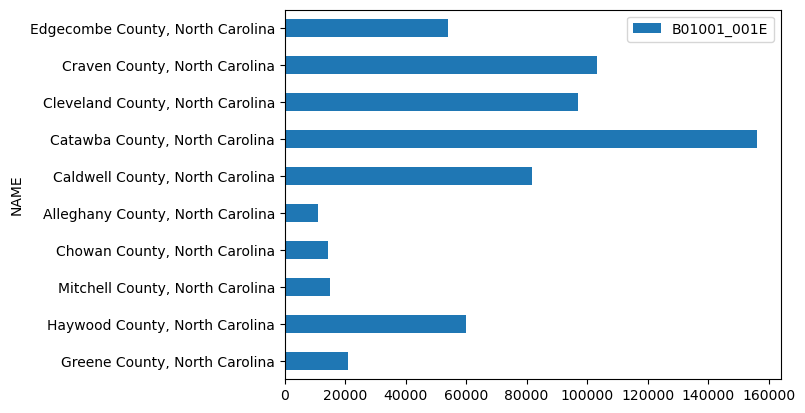

In [13]:
%matplotlib inline
dfACS.head(10).set_index('NAME').plot(kind='barh');